# Exploring Dandiset 001359: Human Patch-seq Recordings from Allen Institute for Brain Science

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please use caution when interpreting the code or results. ⚠️**

## Overview of the Dandiset

This notebook explores Dandiset 001359 (version 0.250401.1603), which contains intracellular patch clamp recordings from human brain samples. The Dandiset is titled "20250331_AIBS_Patchseq_human" and was contributed by the Allen Institute for Brain Science and other collaborators.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001359/0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)

The dataset contains patch-seq recordings from human brain tissue, which combines patch-clamp electrophysiology with single-cell RNA sequencing. This multimodal approach allows researchers to correlate electrophysiological properties with gene expression profiles at the single-cell level. The data includes various types of recordings:

- Current Clamp Stimulus Series
- Current Clamp Series  
- Voltage Clamp Series
- Voltage Clamp Stimulus Series

The measurement techniques include voltage clamp, current clamp, and analytical techniques, following protocols available at [protocols.io](https://www.protocols.io/view/patch-seq-recording-and-extraction-8epv51n45l1b/v3).

## What This Notebook Covers

In this notebook, we will:

1. Connect to the DANDI archive and access the Dandiset metadata
2. Explore the assets (NWB files) available in the Dandiset
3. Load an example NWB file and examine its structure
4. Visualize and analyze electrophysiological recordings, including:
   - Voltage clamp recordings
   - Current clamp recordings
   - Stimulus-response relationships
5. Discuss potential future analyses

This notebook serves as a starting point for researchers interested in analyzing this rich dataset of human neurophysiology recordings.

## Required Packages

The following packages are required to run this notebook:

- `dandi` - For accessing data from the DANDI archive
- `numpy` - For numerical operations
- `matplotlib` - For creating visualizations
- `pynwb` - For working with Neurodata Without Borders files
- `h5py` - For handling HDF5 files
- `remfile` - For remote file access
- `pandas` - For data manipulation and analysis

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

# Set up visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Connecting to the DANDI Archive and Exploring the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"License: {metadata['license']}")
print(f"Contributors: {metadata['contributor']}")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Description: HMBA Lein PatchSeq upload (human) (Q1 2025)
License: ['spdx:CC-BY-4.0']
Contributors: [{'name': 'Gonzalez, Limary', 'email': 'limary.gonzalez@alleninstitute.org', 'roleName': ['dcite:ContactPerson'], 'schemaKey': 'Person', 'identifier': '0009-0009-0306-0002', 'affiliation': [], 'includeInCitation': True}, {'url': 'https://alleninstitute.org/', 'name': 'Allen Institute for Brain Science', 'schemaKey': 'Organization', 'identifier': 'https://ror.org/00dcv1019', 'awardNumber': 'UM1MH130981', 'includeInCitation': True}, {'url': 'https://www.nimh.nih.gov/', 'name': 'National Institute of Mental Health', 'roleName': ['dcite:Funder'], 'schemaKey': 'Organization', 'identifier': 'https://ror.org/04xeg9z08', 'awardNumber': 'UM1MH130981', 'includeInCitation': True}, {'name': ' Kalmbach, Brian', 'email': 'briank@alleninstitute.org', 'roleName': ['dcite:ContactPerson'], 'sche

## Exploring Assets in the Dandiset

The Dandiset contains numerous NWB files, each representing electrophysiological recordings from human brain samples. Let's list some of these assets to get a better understanding of the available data.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading and Exploring an NWB File

Let's load one specific NWB file from this Dandiset. We'll use the file `sub-1214619242/sub-1214619242_ses-1214735405_icephys.nwb` with asset ID `fb159c84-ef03-4c69-89c3-9b8ffcb0f785`.

This file contains intracellular electrophysiology recordings from human brain tissue.

In [4]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/fb159c84-ef03-4c69-89c3-9b8ffcb0f785/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic information about the NWB file
print(f"NWB File Identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Institution: {nwb.institution}")
print(f"Recording session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

# Get subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB File Identifier: 68b5a053c6aa187194118d72e6bcce609d5739bc11400b7e01f729b69d850094
Session ID: 1214735405
Institution: Allen Institute for Brain Science
Recording session start time: 2022-09-29 18:05:26.927000+00:00
File creation date: 2022-09-29 11:54:04.424000-07:00

Subject Information:
Subject ID: 1214619242
Species: Homo sapiens
Age: P11315.0D
Sex: M


## Exploring the Structure of the NWB File

The NWB file contains several types of data, organized in different containers. Let's explore the main components of this file:

In [5]:
# Print the main groups in the NWB file
print("Main groups in the NWB file:")
for key in nwb.fields.keys():
    print(f"- {key}")

# Show acquisition data (recordings)
print("\nTypes of acquisition data:")
acquisition_data_count = {
    "VoltageClampSeries": 0,
    "CurrentClampSeries": 0,
    "Other": 0
}

for key in nwb.acquisition:
    data = nwb.acquisition[key]
    if isinstance(data, pynwb.icephys.VoltageClampSeries):
        acquisition_data_count["VoltageClampSeries"] += 1
    elif isinstance(data, pynwb.icephys.CurrentClampSeries):
        acquisition_data_count["CurrentClampSeries"] += 1
    else:
        acquisition_data_count["Other"] += 1

for data_type, count in acquisition_data_count.items():
    print(f"- {data_type}: {count} recordings")

# Show stimulus data
print("\nTypes of stimulus data:")
stimulus_data_count = {
    "VoltageClampStimulusSeries": 0,
    "CurrentClampStimulusSeries": 0,
    "Other": 0
}

for key in nwb.stimulus:
    data = nwb.stimulus[key]
    if isinstance(data, pynwb.icephys.VoltageClampStimulusSeries):
        stimulus_data_count["VoltageClampStimulusSeries"] += 1
    elif isinstance(data, pynwb.icephys.CurrentClampStimulusSeries):
        stimulus_data_count["CurrentClampStimulusSeries"] += 1
    else:
        stimulus_data_count["Other"] += 1

for data_type, count in stimulus_data_count.items():
    print(f"- {data_type}: {count} stimulus patterns")

Main groups in the NWB file:
- session_description
- identifier
- session_start_time
- timestamps_reference_time
- file_create_date
- icephys_electrodes
- acquisition
- stimulus
- processing
- devices
- intervals
- subject
- sweep_table
- epochs
- session_id
- institution
- data_collection
- source_script
- source_script_file_name
- icephys_filtering

Types of acquisition data:
- VoltageClampSeries: 7 recordings
- CurrentClampSeries: 98 recordings
- Other: 0 recordings

Types of stimulus data:
- VoltageClampStimulusSeries: 7 stimulus patterns
- CurrentClampStimulusSeries: 98 stimulus patterns
- Other: 0 stimulus patterns


## Exploring the Sweep Table

The NWB file contains a sweep table that groups different PatchClampSeries together. Let's examine the structure of this table:

In [6]:
# Convert the sweep table to a pandas DataFrame for easier examination
sweep_df = nwb.sweep_table.to_dataframe()
print(f"Total number of sweeps: {len(sweep_df)}")
print("\nFirst few sweeps:")
print(sweep_df.head())

# Count sweeps by sweep number
sweep_counts = sweep_df['sweep_number'].value_counts().sort_index()
print("\nNumber of series per sweep:")
print(sweep_counts.head(10))

Total number of sweeps: 210

First few sweeps:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2

Number of series per sweep:
sweep_number
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: count, dtype: int64


## Exploring Processing Modules

Let's check if there are any processing modules with additional analyzed data:

In [7]:
# Check processing modules
if hasattr(nwb, 'processing') and len(nwb.processing) > 0:
    print("Processing modules found:")
    for module_name, module in nwb.processing.items():
        print(f"\n- {module_name}: {module.description}")
        print("  Data interfaces:")
        for interface_name in module.data_interfaces:
            print(f"  - {interface_name}")
else:
    print("No processing modules found")

Processing modules found:

- spikes: detected spikes
  Data interfaces:
  - Sweep_10
  - Sweep_100
  - Sweep_101
  - Sweep_11
  - Sweep_19
  - Sweep_22
  - Sweep_24
  - Sweep_25
  - Sweep_26
  - Sweep_28
  - Sweep_39
  - Sweep_41
  - Sweep_42
  - Sweep_43
  - Sweep_44
  - Sweep_45
  - Sweep_46
  - Sweep_47
  - Sweep_49
  - Sweep_51
  - Sweep_52
  - Sweep_58
  - Sweep_61
  - Sweep_62
  - Sweep_65
  - Sweep_66
  - Sweep_68
  - Sweep_7
  - Sweep_71
  - Sweep_72
  - Sweep_73
  - Sweep_74
  - Sweep_75
  - Sweep_79
  - Sweep_8
  - Sweep_80
  - Sweep_85
  - Sweep_9
  - Sweep_90
  - Sweep_91
  - Sweep_93
  - Sweep_96
  - Sweep_97


## Examining an Example Voltage Clamp Recording

Let's examine one of the voltage clamp recordings to understand the structure and content of the data:

In [8]:
# Select an example voltage clamp recording
voltage_clamp_key = None
for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.VoltageClampSeries):
        voltage_clamp_key = key
        break

if voltage_clamp_key:
    voltage_clamp_data = nwb.acquisition[voltage_clamp_key]
    print(f"Selected recording: {voltage_clamp_key}")
    print(f"Type: {type(voltage_clamp_data).__name__}")
    print(f"Starting time: {voltage_clamp_data.starting_time} {voltage_clamp_data.starting_time_unit}")
    print(f"Unit: {voltage_clamp_data.unit}")
    print(f"Data shape: {voltage_clamp_data.data.shape}")
    print(f"Stimulus description: {voltage_clamp_data.stimulus_description}")
    
    # Get the corresponding stimulus if it exists
    stim_key = voltage_clamp_key.replace('AD0', 'DA0')
    if stim_key in nwb.stimulus:
        stim_data = nwb.stimulus[stim_key]
        print(f"\nCorresponding stimulus: {stim_key}")
        print(f"Type: {type(stim_data).__name__}")
        print(f"Unit: {stim_data.unit}")
        print(f"Data shape: {stim_data.data.shape}")
else:
    print("No voltage clamp recording found")

Selected recording: data_00000_AD0
Type: VoltageClampSeries
Starting time: 14.020999908447266 seconds
Unit: amperes
Data shape: (161000,)
Stimulus description: EXTPSMOKET180424_DA_0

Corresponding stimulus: data_00000_DA0
Type: VoltageClampStimulusSeries
Unit: volts
Data shape: (161000,)


## Visualizing Voltage Clamp Data and Stimulus

Let's visualize one of the voltage clamp recordings along with its corresponding stimulus:

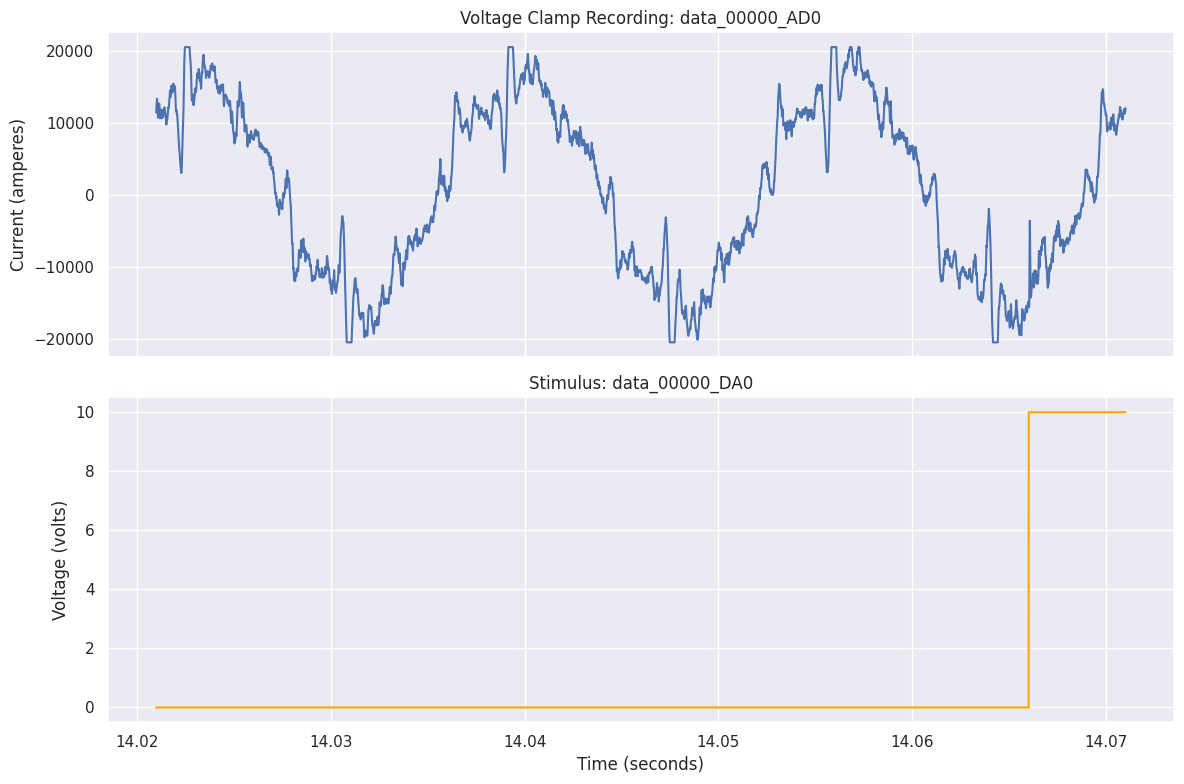

In [9]:
# Plot the voltage clamp data and corresponding stimulus
if voltage_clamp_key:
    # Get the recording data
    voltage_clamp_data = nwb.acquisition[voltage_clamp_key]
    
    # Get the stimulus data if it exists
    stim_key = voltage_clamp_key.replace('AD0', 'DA0')
    stim_data = nwb.stimulus[stim_key] if stim_key in nwb.stimulus else None
    
    # Create a figure with two subplots if stimulus exists, otherwise just one
    if stim_data:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    else:
        fig, ax1, = plt.subplots(1, 1, figsize=(12, 4))
    
    # Select a subset of the data to plot (first 10000 points)
    subset_size = 10000
    data_subset = voltage_clamp_data.data[:subset_size]
    
    # Generate time values based on sampling rate
    sampling_interval = 1.0  # Assuming 1 second per point if rate is not available
    if voltage_clamp_data.rate:
        sampling_interval = 1.0 / voltage_clamp_data.rate
    
    time_values = np.arange(len(data_subset)) * sampling_interval + voltage_clamp_data.starting_time
    
    # Plot the recording data
    ax1.plot(time_values, data_subset)
    ax1.set_ylabel(f"Current ({voltage_clamp_data.unit})")
    ax1.set_title(f"Voltage Clamp Recording: {voltage_clamp_key}")
    
    # Plot the stimulus if it exists
    if stim_data:
        stim_data_subset = stim_data.data[:subset_size]
        ax2.plot(time_values, stim_data_subset, color='orange')
        ax2.set_xlabel(f"Time ({voltage_clamp_data.starting_time_unit})")
        ax2.set_ylabel(f"Voltage ({stim_data.unit})")
        ax2.set_title(f"Stimulus: {stim_key}")
    else:
        ax1.set_xlabel(f"Time ({voltage_clamp_data.starting_time_unit})")
    
    plt.tight_layout()
    plt.show()

## Examining an Example Current Clamp Recording

Now let's examine one of the current clamp recordings:

In [10]:
# Select an example current clamp recording
current_clamp_key = None
for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.CurrentClampSeries):
        current_clamp_key = key
        break

if current_clamp_key:
    current_clamp_data = nwb.acquisition[current_clamp_key]
    print(f"Selected recording: {current_clamp_key}")
    print(f"Type: {type(current_clamp_data).__name__}")
    print(f"Starting time: {current_clamp_data.starting_time} {current_clamp_data.starting_time_unit}")
    print(f"Unit: {current_clamp_data.unit}")
    print(f"Data shape: {current_clamp_data.data.shape}")
    print(f"Stimulus description: {current_clamp_data.stimulus_description}")
    
    # Get the corresponding stimulus if it exists
    stim_key = current_clamp_key.replace('AD0', 'DA0')
    if stim_key in nwb.stimulus:
        stim_data = nwb.stimulus[stim_key]
        print(f"\nCorresponding stimulus: {stim_key}")
        print(f"Type: {type(stim_data).__name__}")
        print(f"Unit: {stim_data.unit}")
        print(f"Data shape: {stim_data.data.shape}")
else:
    print("No current clamp recording found")

Selected recording: data_00006_AD0
Type: CurrentClampSeries
Starting time: 950.1599998474121 seconds
Unit: volts
Data shape: (309191,)
Stimulus description: X0NRMP_DA_0

Corresponding stimulus: data_00006_DA0
Type: CurrentClampStimulusSeries
Unit: amperes
Data shape: (309191,)


## Visualizing Current Clamp Data and Stimulus

Let's visualize the current clamp recording along with its corresponding stimulus:

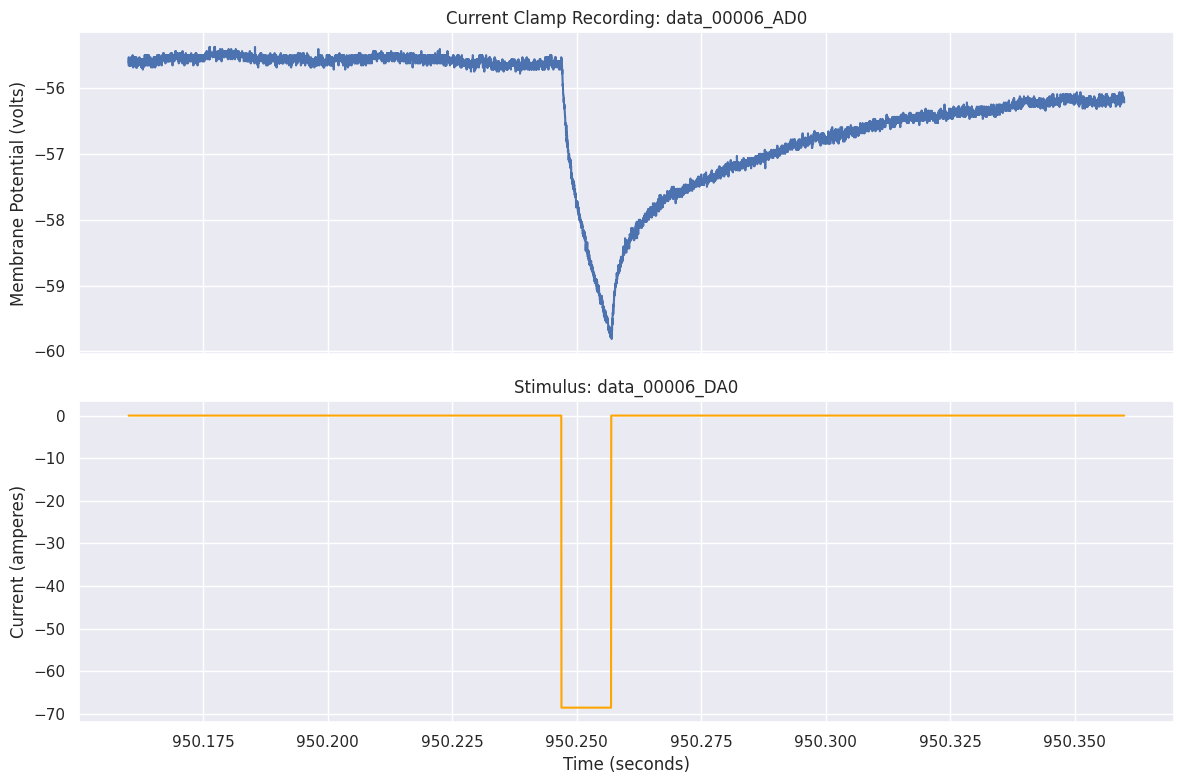

In [11]:
# Plot the current clamp data and corresponding stimulus
if current_clamp_key:
    # Get the recording data
    current_clamp_data = nwb.acquisition[current_clamp_key]
    
    # Get the stimulus data if it exists
    stim_key = current_clamp_key.replace('AD0', 'DA0')
    stim_data = nwb.stimulus[stim_key] if stim_key in nwb.stimulus else None
    
    # Create a figure with two subplots if stimulus exists, otherwise just one
    if stim_data:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    else:
        fig, ax1, = plt.subplots(1, 1, figsize=(12, 4))
    
    # Select a subset of the data to plot (first 10000 points or all if less)
    subset_size = min(10000, current_clamp_data.data.shape[0])
    data_subset = current_clamp_data.data[:subset_size]
    
    # Generate time values based on sampling rate
    sampling_interval = 1.0  # Assuming 1 second per point if rate is not available
    if current_clamp_data.rate:
        sampling_interval = 1.0 / current_clamp_data.rate
    
    time_values = np.arange(len(data_subset)) * sampling_interval + current_clamp_data.starting_time
    
    # Plot the recording data
    ax1.plot(time_values, data_subset)
    ax1.set_ylabel(f"Membrane Potential ({current_clamp_data.unit})")
    ax1.set_title(f"Current Clamp Recording: {current_clamp_key}")
    
    # Plot the stimulus if it exists
    if stim_data:
        stim_subset_size = min(subset_size, stim_data.data.shape[0])
        stim_data_subset = stim_data.data[:stim_subset_size]
        stim_time_values = np.arange(len(stim_data_subset)) * sampling_interval + stim_data.starting_time
        ax2.plot(stim_time_values, stim_data_subset, color='orange')
        ax2.set_xlabel(f"Time ({current_clamp_data.starting_time_unit})")
        ax2.set_ylabel(f"Current ({stim_data.unit})")
        ax2.set_title(f"Stimulus: {stim_key}")
    else:
        ax1.set_xlabel(f"Time ({current_clamp_data.starting_time_unit})")
    
    plt.tight_layout()
    plt.show()

## Exploring Spike Data in the Processing Module

The NWB file contains a processing module called "spikes" that stores detected spike times. Let's examine this data:

Spikes module description: detected spikes
Number of sweeps with detected spikes: 16
Sweeps with spike data: ['Sweep_19', 'Sweep_43', 'Sweep_44', 'Sweep_45', 'Sweep_46', 'Sweep_47', 'Sweep_49', 'Sweep_51', 'Sweep_52', 'Sweep_58', 'Sweep_61', 'Sweep_62', 'Sweep_65', 'Sweep_66', 'Sweep_74', 'Sweep_75']


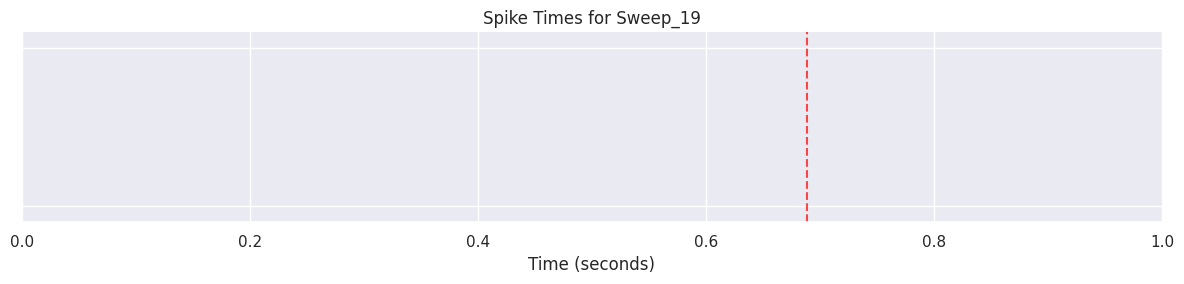

In [12]:
# Check if the spikes processing module exists
if 'spikes' in nwb.processing:
    spikes_module = nwb.processing['spikes']
    print(f"Spikes module description: {spikes_module.description}")
    
    # Count how many sweeps have detected spikes
    sweeps_with_spikes = 0
    sweeps_with_data = []
    
    for interface_name, interface in spikes_module.data_interfaces.items():
        if len(interface.data) > 0:
            sweeps_with_spikes += 1
            sweeps_with_data.append(interface_name)
    
    print(f"Number of sweeps with detected spikes: {sweeps_with_spikes}")
    print(f"Sweeps with spike data: {sweeps_with_data}")
    
    # Plot the spike times for a sweep with spikes
    if sweeps_with_data:
        example_sweep = sweeps_with_data[0]
        spike_data = spikes_module.data_interfaces[example_sweep]
        
        fig, ax = plt.subplots(figsize=(12, 3))
        
        if len(spike_data.timestamps) > 0:
            # Plot spike times as vertical lines
            for spike_time in spike_data.timestamps[:]:
                ax.axvline(x=spike_time, color='red', linestyle='--', alpha=0.7)
            
            # Customize the plot
            ax.set_xlabel('Time (seconds)')
            ax.set_title(f'Spike Times for {example_sweep}')
            # Adjust y-axis for better visualization
            ax.set_ylim([-0.1, 1.1])
            ax.set_yticks([0, 1])
            ax.set_yticklabels(['', ''])
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No spike times found for {example_sweep}")
else:
    print("No 'spikes' processing module found in the NWB file")

## Comparing Multiple Stimulus Intensities

Let's compare responses to different stimulus intensities in the current clamp recordings:

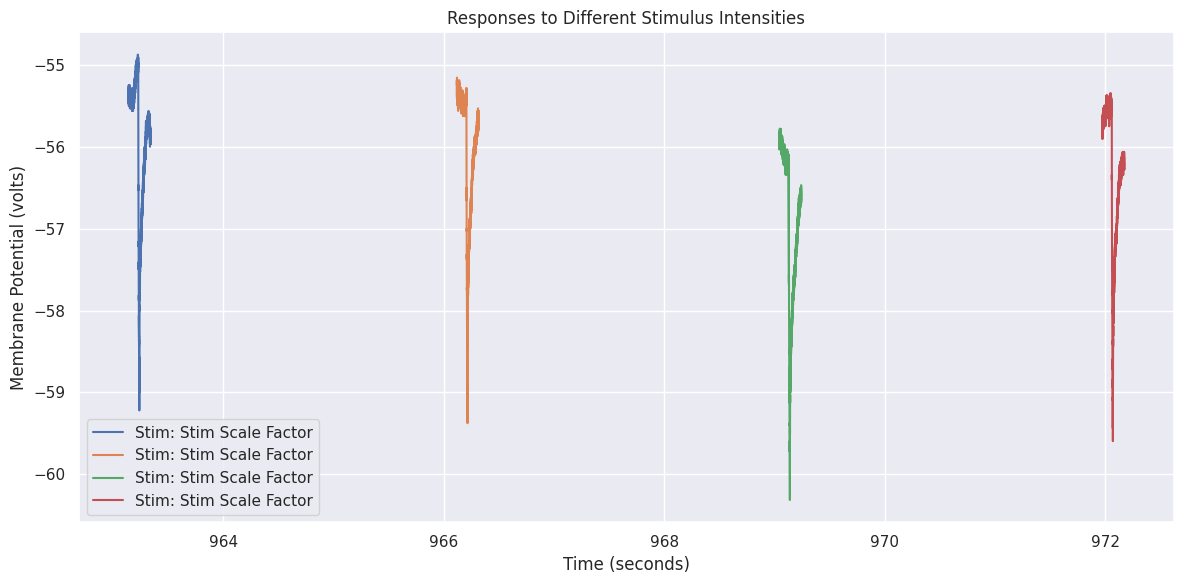

In [13]:
# Find a series of current clamp recordings with different stimulus intensities
current_clamp_series = []
for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.CurrentClampSeries):
        data = nwb.acquisition[key]
        # Filter for a specific type of stimulus protocol
        if "X1PS_SubThresh" in data.stimulus_description:
            current_clamp_series.append(key)

if current_clamp_series:
    # Sort keys to ensure they're in order (if they have sequential numbering)
    current_clamp_series = sorted(current_clamp_series)
    
    # Limit to a small number of traces for clarity
    series_to_plot = current_clamp_series[:4]
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot each trace
    for key in series_to_plot:
        data = nwb.acquisition[key]
        
        # Get stimulus intensity from comments if available
        stim_intensity = "unknown"
        if hasattr(data, 'comments') and data.comments:
            for line in data.comments.split('\n'):
                if "Stim Scale Factor" in line:
                    stim_intensity = line.split(':')[1].strip()
                    break
        
        # Select a subset of the data (adjust as needed based on where the interesting activity is)
        subset_size = min(10000, data.data.shape[0])
        data_subset = data.data[:subset_size]
        
        # Generate time values
        sampling_interval = 1.0  # Default
        if data.rate:
            sampling_interval = 1.0 / data.rate
        
        time_values = np.arange(len(data_subset)) * sampling_interval + data.starting_time
        
        # Plot the data
        ax.plot(time_values, data_subset, label=f"Stim: {stim_intensity}")
    
    # Add labels and legend
    ax.set_xlabel(f"Time (seconds)")
    ax.set_ylabel("Membrane Potential (volts)")
    ax.set_title("Responses to Different Stimulus Intensities")
    ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable current clamp series found for comparison")

## Comparing Different Types of Current Clamp Protocols

Let's identify and compare different types of current clamp protocols based on the stimulus description:

Unique stimulus types found in current clamp recordings:
1. X0NRMP_DA_0
2. C2CHIRPC180503_DA_0
3. X7RAMP_DA_0
4. C2CHIRPB180503_DA_0
5. X5SP_Search_DA_0
6. C2CHIRPA180503_DA_0
7. X3LP_Rheo_DA_0
8. X6SP_Rheo_DA_0
9. X1PS_SubThresh_DA_0
10. X4PS_SupraThresh_DA_0
11. X2LP_Search_DA_0


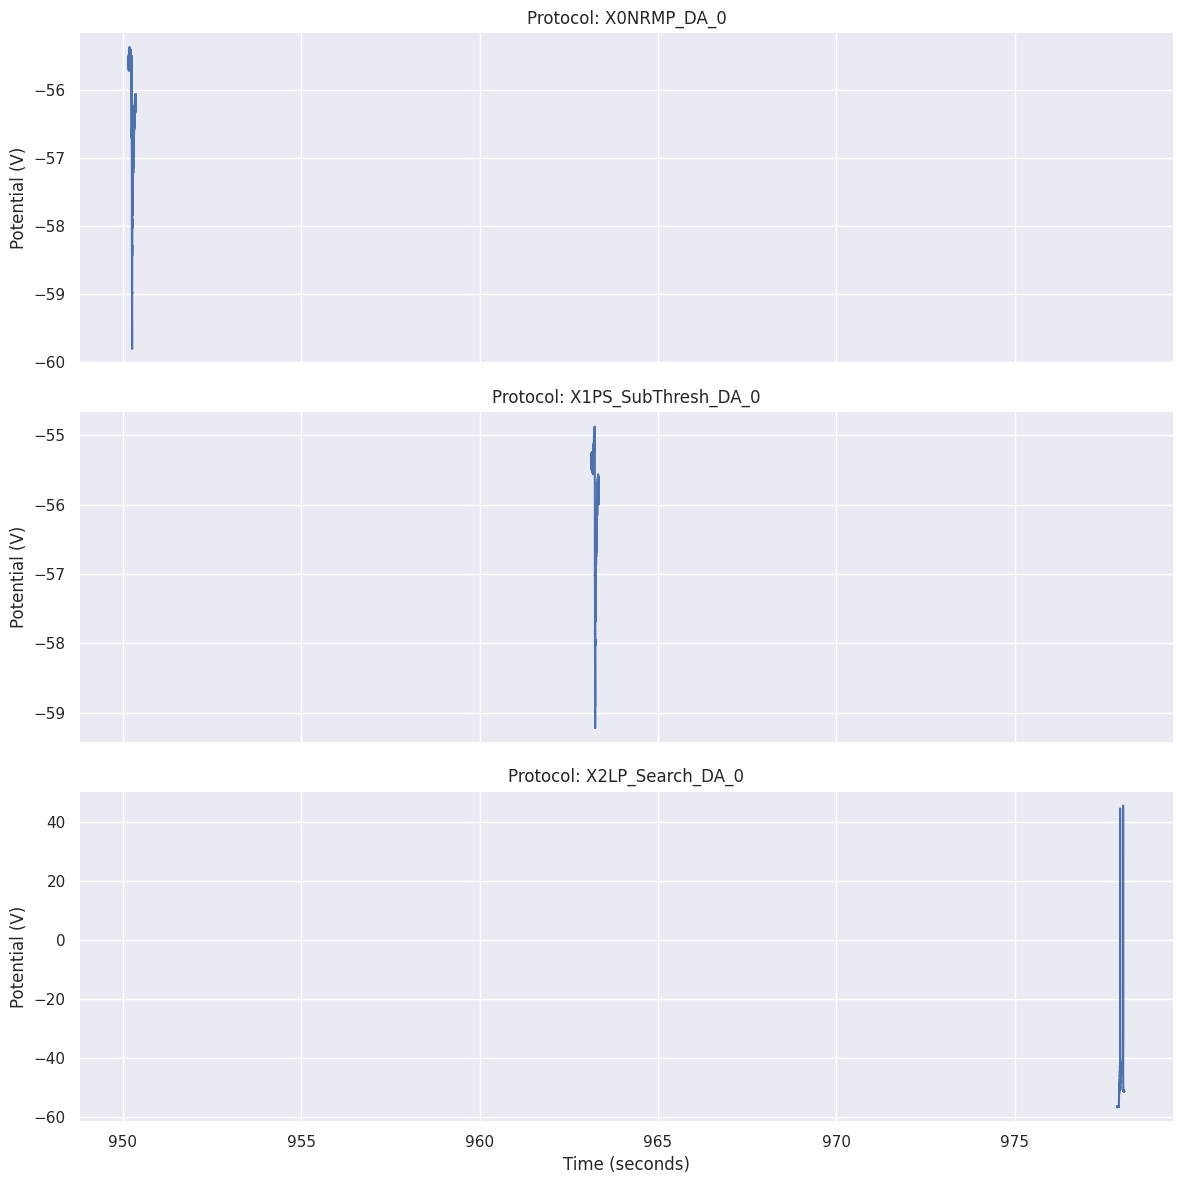

In [14]:
# Identify unique stimulus protocols in current clamp recordings
stimulus_types = set()
for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.CurrentClampSeries):
        data = nwb.acquisition[key]
        if data.stimulus_description:
            stimulus_types.add(data.stimulus_description)

print("Unique stimulus types found in current clamp recordings:")
for i, stim_type in enumerate(stimulus_types):
    print(f"{i+1}. {stim_type}")

# Select one recording from each stimulus type
example_recordings = {}
for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.CurrentClampSeries):
        data = nwb.acquisition[key]
        if data.stimulus_description in stimulus_types and data.stimulus_description not in example_recordings:
            example_recordings[data.stimulus_description] = key

# Plot one example of each protocol type (limiting to 3 for clarity)
protocols_to_plot = list(example_recordings.keys())[:3]

if protocols_to_plot:
    fig, axes = plt.subplots(len(protocols_to_plot), 1, figsize=(12, 4*len(protocols_to_plot)), sharex=True)
    
    # Handle the case where there's only one subplot
    if len(protocols_to_plot) == 1:
        axes = [axes]
    
    for i, protocol in enumerate(protocols_to_plot):
        key = example_recordings[protocol]
        data = nwb.acquisition[key]
        
        # Select a subset of the data
        subset_size = min(10000, data.data.shape[0])
        data_subset = data.data[:subset_size]
        
        # Generate time values
        sampling_interval = 1.0
        if data.rate:
            sampling_interval = 1.0 / data.rate
        
        time_values = np.arange(len(data_subset)) * sampling_interval + data.starting_time
        
        # Plot the data
        axes[i].plot(time_values, data_subset)
        axes[i].set_ylabel("Potential (V)")
        axes[i].set_title(f"Protocol: {protocol}")
    
    # Add a label to the bottom chart only
    axes[-1].set_xlabel("Time (seconds)")
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable protocol examples found")

## Visualizing the Relationship Between Stimulus and Response

Let's visualize the relationship between stimulus and response for one of the sweeps:

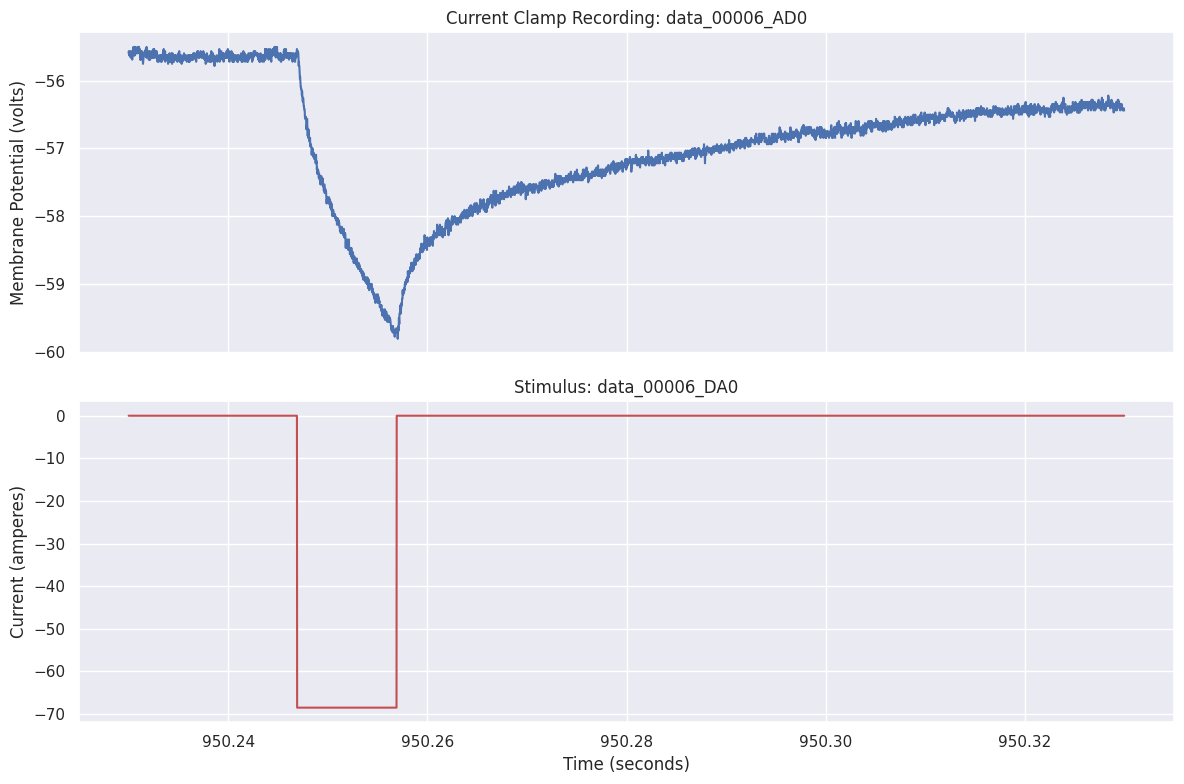

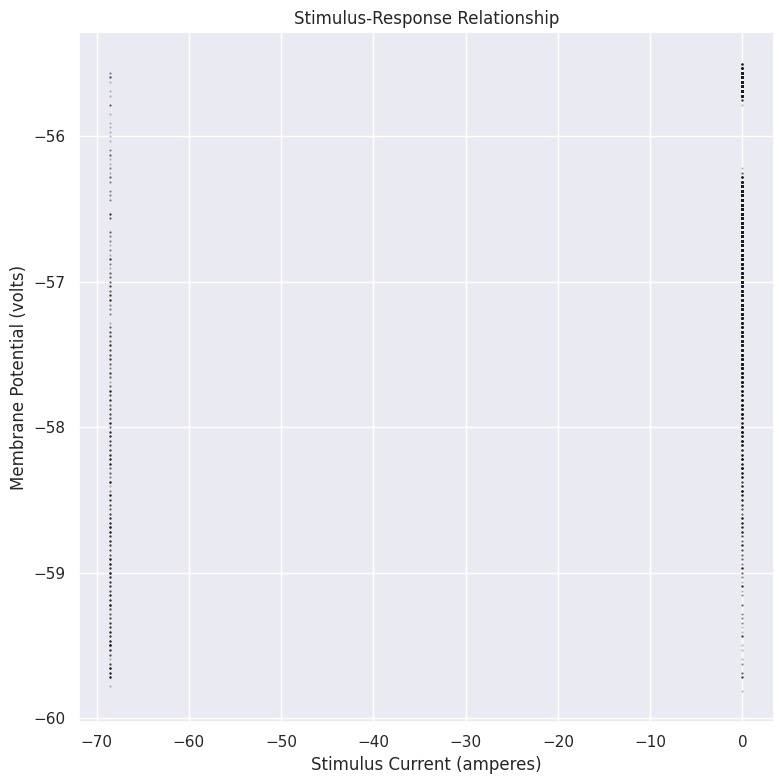

In [15]:
# Select a current clamp recording with its corresponding stimulus for a more detailed analysis
example_cc_key = None

for key in nwb.acquisition:
    if isinstance(nwb.acquisition[key], pynwb.icephys.CurrentClampSeries):
        stim_key = key.replace('AD0', 'DA0')
        if stim_key in nwb.stimulus:
            example_cc_key = key
            break

if example_cc_key:
    cc_data = nwb.acquisition[example_cc_key]
    stim_key = example_cc_key.replace('AD0', 'DA0')
    stim_data = nwb.stimulus[stim_key]
    
    # Select a subset of the data where interesting events might be happening
    # For visualization, we'll focus on a smaller window
    subset_size = min(5000, cc_data.data.shape[0], stim_data.data.shape[0])
    
    # Try to find a more interesting segment by looking for larger stimulus values
    if stim_data.data.shape[0] > 10000:
        # Calculate average stimulus amplitude in windows
        window_size = 1000
        max_abs_amplitude = 0
        best_start = 0
        
        for start_idx in range(0, min(stim_data.data.shape[0], 20000) - window_size, window_size // 2):
            window = stim_data.data[start_idx:start_idx+window_size]
            amplitude = np.max(np.abs(window))
            if amplitude > max_abs_amplitude:
                max_abs_amplitude = amplitude
                best_start = start_idx
        
        data_start_idx = best_start
    else:
        data_start_idx = 0
    
    # Extract the data segments
    cc_subset = cc_data.data[data_start_idx:data_start_idx+subset_size]
    stim_subset = stim_data.data[data_start_idx:data_start_idx+subset_size]
    
    # Generate time values
    sampling_interval = 1.0
    if cc_data.rate:
        sampling_interval = 1.0 / cc_data.rate
    
    time_values = np.arange(len(cc_subset)) * sampling_interval + cc_data.starting_time + data_start_idx * sampling_interval
    
    # Create a figure with two subplots and a shared x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot the membrane potential
    ax1.plot(time_values, cc_subset, 'b')
    ax1.set_ylabel(f"Membrane Potential ({cc_data.unit})")
    ax1.set_title(f"Current Clamp Recording: {example_cc_key}")
    
    # Plot the stimulus current
    ax2.plot(time_values, stim_subset, 'r')
    ax2.set_xlabel(f"Time ({cc_data.starting_time_unit})")
    ax2.set_ylabel(f"Current ({stim_data.unit})")
    ax2.set_title(f"Stimulus: {stim_key}")
    
    plt.tight_layout()
    plt.show()
    
    # Create a phase plot to examine the relationship between stimulus and response
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(stim_subset, cc_subset, 'k.', alpha=0.3, markersize=1)
    ax.set_xlabel(f"Stimulus Current ({stim_data.unit})")
    ax.set_ylabel(f"Membrane Potential ({cc_data.unit})")
    ax.set_title("Stimulus-Response Relationship")
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable current clamp recording with stimulus found")

## Examining the Sweep Table and Epochs

Let's explore the sweep table and epochs in more detail to understand how the recordings are organized:

Number of series per sweep:
sweep_number
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int64



Number of epochs: 7903

First few epochs:
    start_time  stop_time                                               tags  \
id                                                                             
1       14.021     14.066  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
2       14.021     14.121            [Type=Inserted Testpulse, ShortName=TP]   
3       14.066     14.076  [Type=Inserted Testpulse, SubType=Pulse, Ampli...   
4       14.076     14.121  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
5       14.121     14.621   [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]   

                                           timeseries  treelevel  
id                                                                
1   [(0, 9000, data_00000_DA0 pynwb.icephys.Voltag...        1.0  
2   [(0, 20000, data_00000_DA0 pynwb.icephys.Volta...        0.0  
3   [(9000, 2000, data_00000_DA0 pynwb.icephys.Vol...        1.0  
4   [(11000, 9000, data_00000_DA0 pynwb.icephys.Vo...        

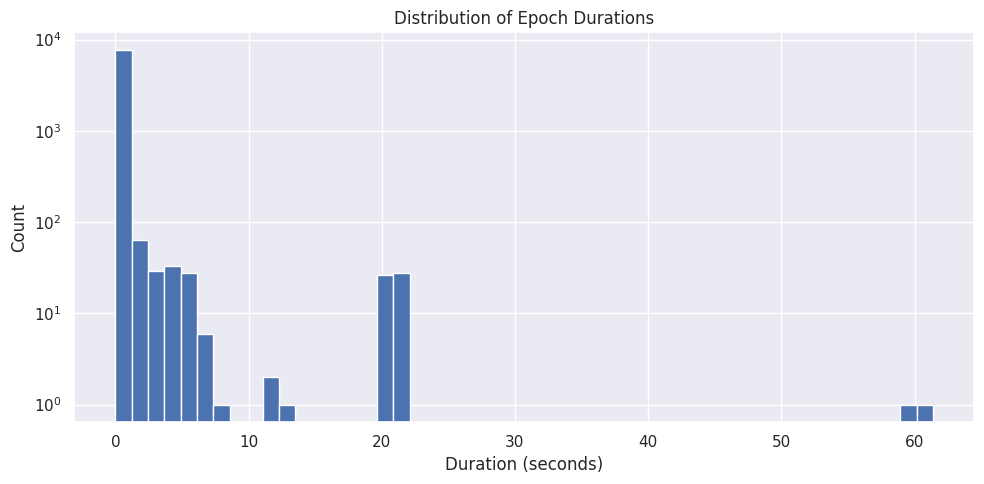

In [16]:
# Get more detailed information from the sweep table
sweep_df = nwb.sweep_table.to_dataframe()

# Count the number of series per sweep number
series_per_sweep = sweep_df.groupby('sweep_number').size()
print("Number of series per sweep:")
print(series_per_sweep.head(10))

# Check if we have epochs information
if hasattr(nwb, 'epochs') and nwb.epochs is not None:
    epochs_df = nwb.epochs.to_dataframe()
    print(f"\nNumber of epochs: {len(epochs_df)}")
    print("\nFirst few epochs:")
    print(epochs_df.head())
    
    # Display the tags for the first few epochs
    if 'tags' in epochs_df.columns:
        print("\nEpoch tags (first 10):")
        for i, tags in enumerate(epochs_df['tags'][:10]):
            print(f"Epoch {i}: {tags}")

    # Plot the distribution of epoch durations
    if 'start_time' in epochs_df.columns and 'stop_time' in epochs_df.columns:
        epochs_df['duration'] = epochs_df['stop_time'] - epochs_df['start_time']
        
        plt.figure(figsize=(10, 5))
        plt.hist(epochs_df['duration'], bins=50)
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Count')
        plt.title('Distribution of Epoch Durations')
        plt.yscale('log')  # Log scale for better visualization
        plt.tight_layout()
        plt.show()
else:
    print("No epochs information found in the NWB file")

## Exploring a Neurosift Link

The NWB file can also be explored interactively using Neurosift. The following link can be used to explore the file we've been analyzing:

[Explore this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fb159c84-ef03-4c69-89c3-9b8ffcb0f785/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

Neurosift provides an interactive web-based viewer for exploring NWB files, which can be helpful for visually navigating through the complex structure of these files.

## Summary and Future Directions

In this notebook, we've explored Dandiset 001359, which contains intracellular patch-clamp recordings from human brain samples. Specifically, we examined:

1. **Dataset Overview**: The Dandiset contains patch-seq recordings from human brain tissue, combining electrophysiology with potential for single-cell RNA sequencing analysis.

2. **Data Structure**: The NWB files contain primarily voltage clamp and current clamp recordings, along with stimulus data and spike time information.

3. **Visualizations**: We created visualizations of the electrophysiological recordings, including:
   - Voltage and current clamp traces
   - Stimulus patterns
   - Relationships between stimulus and response
   - Spike time distributions

### Future Directions

There are many potential directions for further analysis of this dataset:

1. **Cell Type Characterization**: Analyzing electrophysiological properties to classify cells based on their response properties.

2. **Stimulus-Response Properties**: More detailed analysis of how neurons respond to different stimulus patterns and intensities.

3. **Integration with Transcriptomic Data**: If available, correlating electrophysiological properties with gene expression data to understand the molecular basis of neuronal function.

4. **Comparative Analysis**: Comparing these human recordings with similar data from animal models to identify species-specific differences.

5. **Feature Extraction**: Extracting quantitative features from the recordings, such as input resistance, membrane time constants, action potential properties, etc.

This dataset provides a valuable resource for understanding human neuronal physiology and can contribute to our knowledge of how human neurons function at the cellular level.